In [30]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### 读取数据

In [25]:
data = load_iris()  # 特征值：data.data   目标值: target 

In [24]:
x = data.data[:,:2]
y = data.target

In [32]:
logistic = Pipeline([("std", StandardScaler()), ("clf", LogisticRegression())])
logistic.fit(x, y)

c:\users\tao_cp\miniconda3\envs\data\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\tao_cp\miniconda3\envs\data\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [28]:
# 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

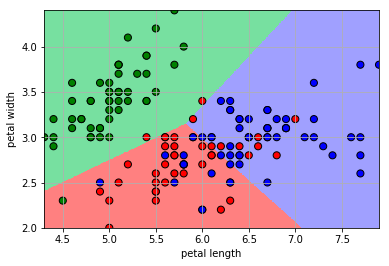

In [34]:
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = logistic.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.savefig('2.png')
plt.show()

In [36]:
# 训练集上的预测结果
y_hat = logistic.predict(x)
print("准确率：", logistic.score(x, y))


y = y.reshape(-1)
result = y_hat == y
print(y_hat)
print(result)
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

准确率： 0.7933333333333333
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1
 2 2 2 2 1 1 1 1 1 1 0 0 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False  True False  True False  True False  True
  True  True  True False  True False  True  True  True  True False  True
  True  True False False False False  True  True  True  True  True  True
 False False False  True  True  True  True False  True  True  True  True
  True False  True  True  True False  True  True  True  True False  True
  True  True 